In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_simple_data(n_samples):
    epsilon = np.random.normal(size=(n_samples)) # smaple noise from Gaussin dist with mean 0, std = 1.0
    x = np.random.uniform(-10.5, 10.5, n_samples)
    y = 7 * np.sin(0.75 * x) + 0.5 * x + epsilon
    return x, y

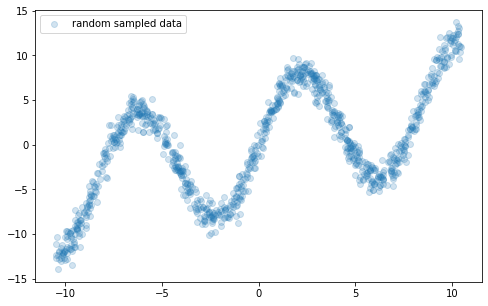

In [3]:
#generate sample data
x, y = generate_simple_data(1000)

fig, ax = plt.subplots(1,1, figsize=(8,5))
ax.scatter(x,y, alpha=0.2, label='random sampled data')
plt.legend()
plt.show()

## Simple Gaussian Network

In [8]:
from src.nn.MLP import MLP

class GaussianLayer(nn.Module):
    
    def __init__(self, input_dim, n_gaussian):
        super(GaussianLayer, self).__init__()
        self.n_gaussian = n_gaussian
        self.z_mu = torch.nn.Linear(input_dim, n_gaussian)
        self.z_sigma = torch.nn.Linear(input_dim, n_gaussian)
        
    def forward(self, x):       
        mu = self.z_mu(x)
        std = self.z_sigma(x)
        std = torch.exp(std)
        return mu, std
    
class GaussianNetwork(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GaussianNetwork, self).__init__()
        self.mlp = MLP(input_dim, hidden_dim)
        self.gaussian_layer = GaussianLayer(hidden_dim, 1)
        
    def forward(self, x):
        x = self.mlp(x)
        mu, std = self.gaussian_layer.forward(x)
        return mu, std

In [10]:
gaussianNet = GaussianNetwork(1, 100, 1)
opt = torch.optim.Adam(gaussianNet.parameters())

In [11]:
x_tensor = torch.tensor(x).reshape(-1, 1).float()
y_tensor = torch.tensor(y).reshape(-1, 1).float()

## Visualizing the NOT trained model


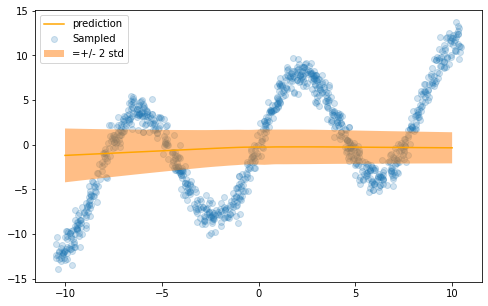

In [12]:
_x_tensor = torch.linspace(-10, 10, 100).reshape(-1,1)
mu, std = gaussianNet(_x_tensor)
N_STD = 2

x_axis = np.squeeze(_x_tensor.detach().numpy())
upper = mu + N_STD *std
upper_np = np.squeeze(upper.detach().numpy())

lower = mu - N_STD * std
lower_np = np.squeeze(lower.detach().numpy())

fig, ax = plt.subplots(1,1, figsize=(8,5))
ax.scatter(x, y, alpha=0.2, label='Sampled')
ax.plot(x_axis, mu.detach().numpy(), color='orange', label='prediction')
ax.fill_between(x_axis, upper_np, lower_np, alpha=0.5, label='=+/- {} std'.format(N_STD))
plt.legend()
plt.show()

In [13]:
 def gaussianLL(mu, std, y):
    log_exp_terms = torch.pow(y-mu, 2) / (2*torch.pow(std, 2))
    log_scaler_terms = -0.5 * (torch.log(torch.tensor(2.0)) + torch.log(torch.tensor(np.pi)) + 2*torch.log(std))
    LL = log_scaler_terms - log_exp_terms
    return LL

In [ ]:
for i in range(1500):
    mu, std = gaussianNet(x_tensor)
    loss = gaussianLL(mu, std, y_tensor)
    loss = -loss.mean()
    opt.zero_grad()
    loss.backward()
    opt.step()

## Visualizing the trained model

In [ ]:
x_tensor = torch.linspace(-10, 10, 100).reshape(-1,1)
mu, std = gaussianNet(x_tensor)
N_STD = 2

x_axis = np.squeeze(x_tensor.detach().numpy())
upper = mu + N_STD *std
upper_np = np.squeeze(upper.detach().numpy())

lower = mu - N_STD * std
lower_np = np.squeeze(lower.detach().numpy())

fig, ax = plt.subplots(1,1, figsize=(8,5))
ax.scatter(x, y, alpha=0.2, label='Sampled')
ax.plot(x_axis, mu.detach().numpy(), color='orange', label='prediction')
ax.fill_between(x_axis, upper_np, lower_np, alpha=0.5, label='=+/- {} std'.format(N_STD))
plt.legend()
plt.show()



